# MRO - Method Resolution Order

In **Hybrid Inheritance** the **method resolution order** is decided based on the **MRO algorithm**.

This algorithm is also known as the **C3 algorithm**.

Samuele Pedroni proposed this algorithm.

It follows **DLR** (Depth First - Left to Right). 
* That is, the **child will get more priority than the parent**.
* **Left Parent will get more priority than Right Parent**.

**`MRO( X ) = X + Merge( MRO(P1), MRO(P2), ..., ParentList )`**

> **NOTE:** 
> * We can find MRO of any class by using mro( ) function: `print( ClassName.mro( ))` 
> * Every python class is child class of Object class.

**`MRO( X ) = X + Merge( MRO(P1), MRO(P2), ..., ParentList )`** → here we have to consider only immediate parents.

# Head vs. Tail Element

* Assume `C1`, `C2`, `C3`, ... are classes.
* In the list: `C1C2C3C4C5`....
* `C1` is considered as **Head Element** and the remaining is considered as **Tail**.
    * **Head Element** → `C1`
    * **Tail Element** → `C2C3C4…`

# Merge Process

* Take the head of the first list.
* If the head is not in the tail part of any other list, then add this head to the result and remove it from the lists in the merge.
* If the head is present in the tail part of any other list, then consider the head element of the next list and continue the same process.

# Example 1

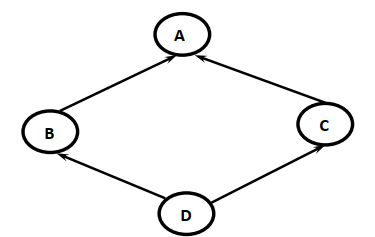

```
Object → O
MRO(A) = A, object = AO
MRO(B) = B, A, object = BAO
MRO(C) = C, A, object = CAO


MRO(D) 
= D + Merge ( MRO(B), MRO(C), BC ) 
= D + Merge ( BAO, CAO, BC ) 
= D + B + Merge( AO, CAO, C )
= D + B + C + Merge( AO, AO )
= D + B + C + A + Merge( O, O )
= D + B + C + A + O = DBCAO


```

In [1]:
class A:pass
class B(A):pass
class C(A):pass
class D(B,C):pass

print(A.mro())    # [<class '__main__.A'>, <class 'object'>]
print(B.mro())    # [<class '__main__.B'>, <class '__main__.A'>, <class 'object'>]
print(C.mro())    # [<class '__main__.C'>, <class '__main__.A'>, <class 'object'>]
print(D.mro())    # [<class '__main__.D'>, <class '__main__.B'>, <class '__main__.C'>, <class '__main__.A'>,<class 'object'>]

[<class '__main__.A'>, <class 'object'>]
[<class '__main__.B'>, <class '__main__.A'>, <class 'object'>]
[<class '__main__.C'>, <class '__main__.A'>, <class 'object'>]
[<class '__main__.D'>, <class '__main__.B'>, <class '__main__.C'>, <class '__main__.A'>, <class 'object'>]


# Example 2

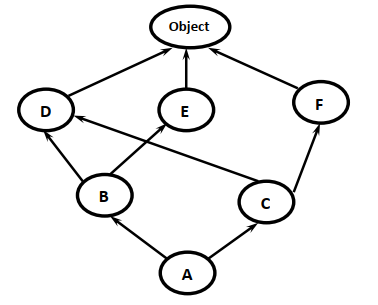

```
Object → O
MRO(A) = AO
MRO(B) = BO
MRO(C) = CO

MRO(X) 
= X + Merge( MRO(A), MRO(B), AB ) 
=  X + Merge(AO, BO, AB) 
= X + A + B + O = XABO

MRO(Y) 
= Y + Merge( MRO(B), MRO(C), BC ) 
=  X + Merge(BO, CO, BC) 
= Y + B + C + O = YBCO

MRO(P) 
= P + Merge( MRO(X), MRO(Y), MRO(C), XYC ) 
= P + Merge( XABO, YBCO, CO, XYC )
= P + X + Merge( ABO, YBCO, CO, YC )
= P + X+ A + Merge( BO, YBCO, CO, YC )
= P + X + A + Y + Merge( BO, BCO, CO, C )
= P + X + A + Y + B + Merge( O, CO, CO, C )
= P + X + A + Y + B + C + Merge( O, O, O )
= P + X + A + Y + B + C + O = PXAYBCO

```

In [6]:
class A:pass
class B:pass
class C:pass
class X(A,B):pass
class Y(B,C):pass
class P(X,Y,C):pass

print(A.mro())  # [<class '__main__.A'>, <class 'object'>]
print(X.mro())  # [<class '__main__.X'>, <class '__main__.A'>, <class '__main__.B'>, <class 'object'>]
print(Y.mro())  # [<class '__main__.Y'>, <class '__main__.B'>, <class '__main__.C'>, <class 'object'>]
print(P.mro())  # [<class '__main__.P'>, <class '__main__.X'>, <class '__main__.A'>, <class '__main__.Y'>,<class '__main__.B'>,<class '__main__.C'>, <class 'object'>]

[<class '__main__.A'>, <class 'object'>]
[<class '__main__.X'>, <class '__main__.A'>, <class '__main__.B'>, <class 'object'>]
[<class '__main__.Y'>, <class '__main__.B'>, <class '__main__.C'>, <class 'object'>]
[<class '__main__.P'>, <class '__main__.X'>, <class '__main__.A'>, <class '__main__.Y'>, <class '__main__.B'>, <class '__main__.C'>, <class 'object'>]


# test.py

In [4]:
class A:
  def m1(self):
    print('A class Method')

class B:
  def m1(self):
    print('B class Method')

class C:
  def m1(self):
    print('C class Method')

class X(A,B):
  def m1(self):
    print('X class Method')

class Y(B,C):
  def m1(self):
    print('Y class Method')
    
class P(X,Y,C):
  def m1(self):
    print('P class Method')
    
p=P()
p.m1()

P class Method


* In the example, the `P` class `m1( )` method will be considered.
* If the `P` class does not contain the `m1( )` method then as per `MRO → X class method` will be considered. 
* If the `X` class does not contain then the `A` class method will be considered and this process will be continued.
* The method resolution is in the following order: `PXAYBCO`

# Example 3

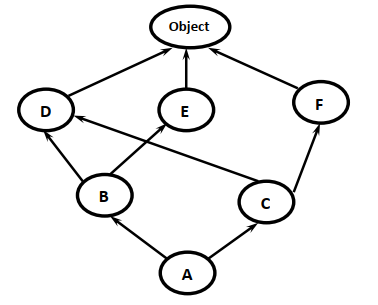

```
Object → O
MRO(O) = O
MRO(D) = DO
MRO(E) = EO
MRO(F) = FO


MRO(B) 
= B + Merge( MRO(D), MRO(E), DE )
= B + Merge( DO, EO, DE )
= B + D + Merge( O, EO, E )
= B + D + E + Merge( O, O )
= B + D + E + O = BDEO


MRO(C) 
= C + Merge( MRO(D), MRO(F), DF )
= C + Merge( DO, FO, DF )
= C + D + Merge( O, FO, F )
= C + D + F + Merge( O, O )
= C + D + F + O = CDFO

 

MRO(A) 
= A + Merge( MRO(B), MRO(C), BC )
= A + Merge( BDEO, CDFO, BC )
= A + B + Merge( DEO, CDFO, C )
= A + B + C + Merge( DEO, DFO )
= A + B + C + D + Merge( EO, FO )
= A + B + C + D + E + Merge( O, FO )
= A + B + C + D + E + F + Merge( O, O )
= A + B + C + D + E + F + O = ABCDEFO

```

In [5]:
class D:pass
class E:pass
class F:pass
class B(D,E):pass
class C(D,F):pass
class A(B,C):pass

print(D.mro())  # [<class '__main__.D'>, <class 'object'>]
print(B.mro())  # [<class '__main__.B'>, <class '__main__.D'>, <class '__main__.E'>, <class 'object'>]
print(C.mro())  # [<class '__main__.C'>, <class '__main__.D'>, <class '__main__.F'>, <class 'object'>]
print(A.mro())  # [<class '__main__.A'>, <class '__main__.B'>, <class '__main__.C'>, <class '__main__.D'>,<class '__main__.E'>, <class '__main__.F'>, <class 'object'>]

[<class '__main__.D'>, <class 'object'>]
[<class '__main__.B'>, <class '__main__.D'>, <class '__main__.E'>, <class 'object'>]
[<class '__main__.C'>, <class '__main__.D'>, <class '__main__.F'>, <class 'object'>]
[<class '__main__.A'>, <class '__main__.B'>, <class '__main__.C'>, <class '__main__.D'>, <class '__main__.E'>, <class '__main__.F'>, <class 'object'>]
